In [144]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel





In [145]:
print(os.listdir(r"C:\Users\kandu\Downloads\archive"))


['Testing', 'Training']


In [146]:
SIZE = 128

In [147]:
path=os.listdir(r'C:\Users\kandu\Downloads\archive\Training')

#Capture images and labels into arrays.
#Start by creating empty lists

In [148]:
train_images = []
train_labels = [] 
for directory_path in glob.glob('C:/Users/kandu/Downloads/archive/Training/*'):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional step. Change BGR to RGB
        train_images.append(img)
        train_labels.append(label)

glioma_tumor
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (1).jpg
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (10).jpg
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (100).jpg
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (101).jpg
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (102).jpg
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (103).jpg
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (104).jpg
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (105).jpg
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (106).jpg
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (107).jpg
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (108).jpg
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (109).jpg
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (11).jpg
C:/Users/kandu/Downloads/archive/Training\glioma_tumor\gg (110).jpg
C:/Users/kandu/Downloads/archive/Traini

In [149]:
np.unique(train_labels)

array(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
      dtype='<U16')

In [150]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [151]:
pd.Series(train_labels).value_counts()

pituitary_tumor     827
glioma_tumor        826
meningioma_tumor    822
no_tumor            395
dtype: int64

#Do exactly the same for test/validation image

In [152]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("C:/Users/kandu/Downloads/archive/Testing/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [153]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [154]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [155]:
x_train.shape

(2870, 128, 128, 3)

In [156]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [157]:
x_train.shape

(2870, 128, 128, 3)

In [158]:
x_test.shape

(394, 128, 128, 3)

In [159]:
y_test.shape

(394,)

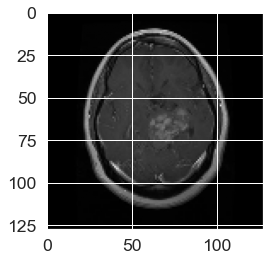

In [160]:
plt.imshow(x_train[0],cmap='gray')

In [161]:
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #iterate through each file 
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        input_img = x_train[image, :,:,:]
        img = input_img
 
            
         # FEATURE 1 - Pixel values
         
        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [162]:
image_features = feature_extractor(x_train)

In [163]:
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF = np.reshape(image_features, (x_train.shape[0], -1))

In [164]:
from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo',gamma=0.5)  #For multiclass classification
SVM_model.fit(X_for_RF, y_train)

SVC(decision_function_shape='ovo', gamma=0.5)

In [165]:
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

In [166]:
test_prediction =SVM_model.predict(test_for_RF)

In [167]:
test_prediction = le.inverse_transform(test_prediction)


Accuracy =  0.8578680203045685


<AxesSubplot:>

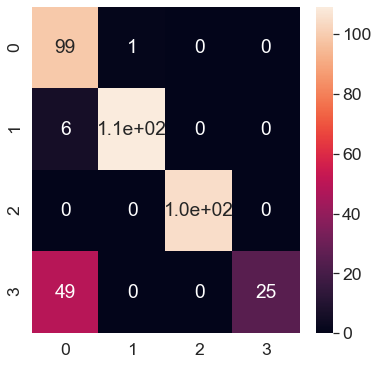

In [168]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

The prediction for this image is:  ['meningioma_tumor']
The actual label for this image is:  meningioma_tumor


C:\Users\kandu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


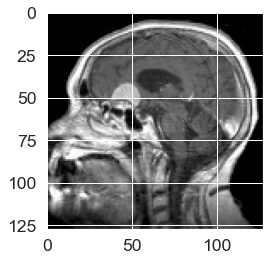

In [173]:
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = SVM_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

# overall the model is good with an accuracy of 0.85

1.The data was taken from kaggle the name of the dataset is brain tumor classification
2.the data has four classes which we want to classify
3.the images are different size we should make them to one size
4.i have used svm to buld the model